Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

# Coursework Assignment (COMP 42315)

The assignment consists of 3 questions. You are required to implement the programming solution containing your code and written answers that explain the implementation and justify the design. For more details, refer to the assignment brief on Blackboard Ultra page 

https://blackboard.durham.ac.uk/ultra/courses/_54354_1/outline/file/_1723127_1

# Instructions (Question 1 and 2)

For Questions 1 and 2, you are asked to perform the following tasks based on the following target website, which contains artificial content designed for this assignment: https://sitescrape.awh.durham.ac.uk/comp42315/

# Question 1 (35 marks)

Please design and implement a solution to crawl the publication title, year and author list of every unique publication record on the target website. Then, please create and display a table that contains these unique records. The table should consist of five columns: the row number in the table, publication title, year, author list, and the number of authors (hint: you will need to develop an algorithm to work this out). The records should be sorted first according to descending year values, then by descending number of author values, and finally by the titles from A to Z. Include the full final result in your Jupyter Notebook. 

[Explain your design and highlight any features in this question’s report part of your Jupyter Notebook in no more than 300 words. (35%)]

### Write your code in the following space.

In [4]:
# YOUR CODE HERE
# my z0 number:Z0198757

import requests
from bs4 import BeautifulSoup
import time
import pandas as pd 
import re
import matplotlib.pyplot as plt

bcontinue = True;
urlwebsite = "https://sitescrape.awh.durham.ac.uk/comp42315/"
urlwebsite_publication = "https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_type_animationandgraphics.htm"
strurl = urlwebsite_publication

#extract the title 
def title_extract(pub_section_soup):
    pub_title_soup = pub_section_soup.find("span", class_ = "PublicationTitle")
    pub_title = pub_title_soup.text
    #print(pub_title)
    return pub_title

# extract the year 
def year_extract(pub_section_soup):
    pub_year_soup = pub_section_soup.find("span", class_ = "TextSmall")
    pub_year = pub_year_soup.text[-4:]
    #print(pub_year)
    return pub_year

#extract the author list  
def author_list_extract(pub_section_soup):
    #pub_authors_list = []
    pub_spans = pub_section_soup.find_all("span", class_ = "TextSmall")
    
    #all author names are stored in the second span, so index = 1 
    author_span = pub_spans[1].text
    pub_authors_list = author_span.replace(" and",",").split(",")  # first replace " and", then make srting into a list by using split
    #print(pub_authors_list)
    return pub_authors_list

# create a function to loop through all topic webpages in publication page 
def topic_loop(bcontinue, urlwebsite, urlwebsite_publication):
    urls_by_topic = []
    class_text_options = []
    strurl = urlwebsite_publication
    page = requests.get(strurl, verify = False)
    soup = BeautifulSoup(page.content, "html.parser")
    class_text_options = soup.find_all('p', class_='TextOption')
    topic_raw = class_text_options[1].text
    #clean the data and put it in a list 
    topic_list = topic_raw.replace(" / ",",").replace(" ","").replace("\xa0","").lower().replace("topic:","").split(",")
    
    #using a loop to create full link for all topics
    for topic in topic_list:
        strurl = urlwebsite + "publicationfull_type_" + topic + ".htm"
        #print(strurl)
        urls_by_topic.append(strurl)
        time.sleep(1)
    return topic_list, urls_by_topic
    
#quote the function
topic_list, urls_by_topic  = topic_loop(bcontinue, urlwebsite, urlwebsite_publication)

topic_list_df = pd.DataFrame({
    'topic_list': topic_list,
    'urls_by_topic': urls_by_topic
})

## define a function to loop all topic pages and extract title, year, and author list 
pub_info_table = pd.DataFrame(columns = 
                            ["row_no",
                            "publication_title",
                            "year",
                            "author_list",
                            "the_number_of_authors"])

def get_url_in_current_page(url):  
    for url in urls_by_topic:
        pub_section_soups = []
        page = requests.get(url, verify = False)
        soup = BeautifulSoup(page.content, "html.parser")    
        pub_section_soups = soup.find_all("div", class_ = "w3-container w3-cell w3-mobile w3-cell-middle")

        for pub_section_soup in pub_section_soups:
            # extract title, year, and author list 
            pub_title = title_extract(pub_section_soup)
            pub_year = year_extract(pub_section_soup)
            pub_authors_list = author_list_extract(pub_section_soup)
            #store pub information in a table 

            pub_info_table.loc[len(pub_info_table)] = {
                "row_no": len(pub_info_table) + 1,
                "publication_title": pub_title,
                "year": pub_year,
                "author_list": pub_authors_list,
                "the_number_of_authors": len(pub_authors_list)
            }
        
    return pub_info_table

get_url_in_current_page(strurl)

#dedupe 
pub_info_table_dedup = pub_info_table.drop_duplicates(subset = ["publication_title", "year"])
#sort 
pub_info_table_dedup_sort = pub_info_table_dedup.sort_values(by = ["year","the_number_of_authors","publication_title"], ascending=[False, False, True])

#re-order based on current ranking 
pub_info_table_dedup_sort = pub_info_table_dedup_sort.reset_index(drop = True)
pub_info_table_dedup_sort["row_no"] = range(1,len(pub_info_table_dedup_sort) + 1)
pub_info_table_dedup_sort

/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warn

,row_no,publication_title,year,author_list,the_number_of_authors
0,1,A Video-Based Augmented Reality System for Hum...,2023,"[Kanglei Zhou, Ruizhi Cai, Yue Ma, Qingqing...",10
1,2,A Mixed Reality Training System for Hand-Objec...,2023,"[Kanglei Zhou, Chen Chen, Yue Ma, Zhiying L...",7
2,3,Correlation-Distance Graph Learning for Treatm...,2023,"[Xiatian Zhang, Sisi Zheng, Hubert P. H. Shu...",7
3,4,Unaligned 2D to 3D Translation with Conditiona...,2023,"[Abril Corona-Figueroa, Sam Bond-Taylor, Nee...",7
4,5,Region-Based Appearance and Flow Characteristi...,2023,"[Yona Falinie A. Gaus, Neelanjan Bhowmik, Br...",6
...,...,...,...,...,...
155,156,Simulating Competitive Interactions using Sing...,2007,"[Hubert P. H. Shum, Taku Komura, Shuntaro Ya...",3
156,157,Generating Realistic Fighting Scenes by Game Tree,2006,"[Hubert P. H. Shum, Taku Komura]",2
157,158,Technical Note: Generating Realistic Fighting ...,2006,"[Hubert P. H. Shum, Taku Komura]",2
158,159,Tracking the Translational and Rotational Move...,2005,"[Hubert P. H. Shum, Taku Komura]",2


### Write your description in the following space.

my z0 number:Z0198757

I first analysed the whole website, and found that publication articles are in different topics. So the main idea is 1) go to each topic website 2) find all publication articles in each topic website 3) extract title, year. author list, and then 4) put these information into a table.

Here’s the details:

1) go to each topic website  

I use function topic_loop(bcontinue, urlwebsite, urlwebsite_publication) to find all topic webpage urls, and store the topic and urls in two lists: topic_list, urls_by_topic

2) find all publication articles in each topic website

Under each topic webpage, there are multiple publication articles, I use function get_url_in_current_page(url) to go to the publication section, which is named pub_section_soup.

3) extract title, year. author list

I use three functions to extract title, year, and author_list, named title_extract(pub_section_soup), year_extract(pub_section_soup) andauthor_list_extract(pub_section_soup). And then I put these three functions within the loop in function get_url_in_current_page(url)

4) put this information into a table

The get_url_in_current_page(url) returns a table named pub_info_table, where I put publication title, year, and author list and count of authors in. I also added row no. 

5) sort and dedupe

I use 2 variables :"publication_title", "year" to dedupe the pub_info_table, and then sort as required.  

To sum up, I use BeautifulSoup function in python to extract url links, text in webpages, and store them into a dataframe. 

word count: 221


# Question 2 (30 marks)

For this question, you should record the year, number of citations, topic, and number of Links, Downloads, and Online Resources (LDOR) for each journal paper listed on the scraping website and store these in a dataframe. Take care to filter the elements for uniqueness before producing the analysis. Produce a table showing the mean and variance of citations per journal publication in each topic and print it legibly in your submission. In Figure 1, you should show the mean and variance of citations per year across all journal publications for each topic. In Figure 2, you should show the number of LDOR against the number of citations for each journal publication. Each figure should be legible and have appropriate labels. 

[Explain your design and highlight any features in this question’s report part of your Jupyter Notebook in no more than 300 words. (30%)]

### Write your code in the following space.

/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/apps/jupyterhub/COMP42315/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sitescrape.awh.durham.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warn

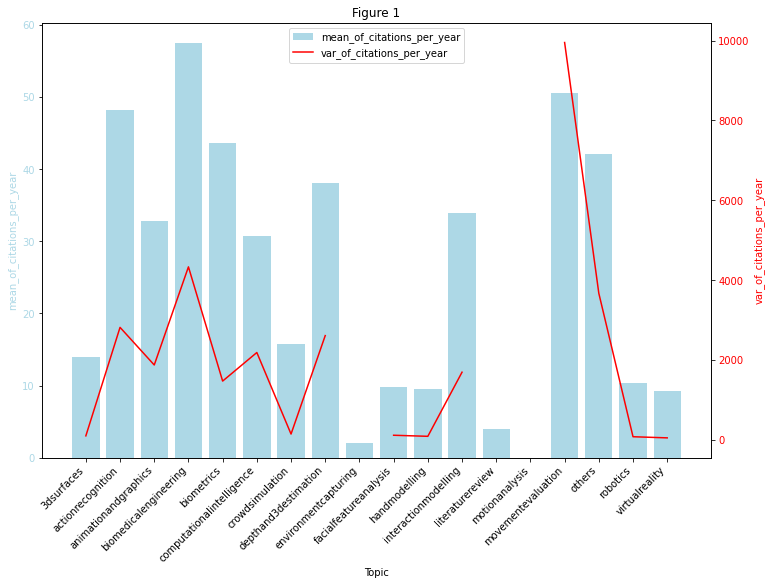

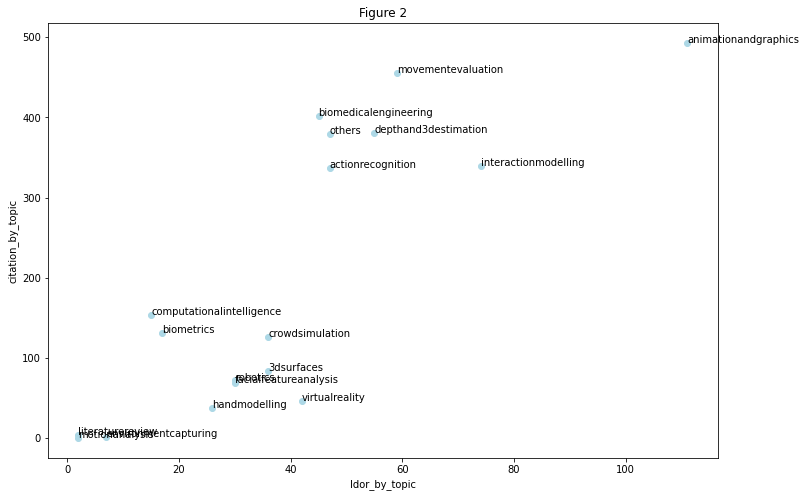

In [5]:
# YOUR CODE HERE
# my z0 number:Z0198757
def get_button_urls(url):
    button_urls = [] 
    page = requests.get(url, verify = False)
    soup = BeautifulSoup(page.content, "html.parser")

    # find next button
    next_buttons = soup.find_all('a', class_='LinkButton')

    # If the next button is found
    if next_buttons:
        for next_button in next_buttons:
            strurl = urlwebsite + next_button.get("href")
            button_urls.append(strurl)
    else:
        bcontinue = False

    return button_urls

#a scraping function for each website, return 2)year 3)#of citations 4)# of LDOR
def get_citation(button_url):
    
    page = requests.get(button_url, verify = False)
    soup = BeautifulSoup(page.content, "html.parser") 
    #get title and citation
    pub_title = soup.h1.text.strip().split("\xa0")[0]
    
    #get # of citation 
    citation_span = soup.h1.span
    no_of_citation = None
    if citation_span:
        match = re.search(r'Citation:\s+(\d+)', citation_span.text)
        if match: 
            no_of_citation = match.group(1)
    
    #get the year 
    year_text = soup.h2.get_text()
    year_match = re.search(r'\b(20\d{2})\b', year_text)
    if year_match:
        year = year_match.group(1)    
    
    #get #of links of LDOR
    ldor_section = soup.find('h2', text = 'Links, Downloads and Online Resources')
    ldor_div = ldor_section.find_next_sibling('div')
    ldors = ldor_div.find_all('a')
    
    unique_ldors_set = set() #set doesn't allow duplicate
    for ldor in ldors:
        urla = ldor.get('href')
        unique_ldors_set.add(urla)
    
    unique_ldors_list = list(unique_ldors_set)
    
    #get the youtube link 
    youtube_iframes = soup.find_all('iframe', class_='youtube-player')
    ldor_count =  len(unique_ldors_list) + len(youtube_iframes)
    return pub_title,no_of_citation,ldor_count,year


## go to each page and get 1)topic 2)year 3)#of citations 4)# of LDOR
def get_url_in_current_page(urls_by_topic):  
    button_urls = [] 
    pub_titles = []
    no_of_citations = []
    ldor_counts = []
    years = []
    topics = []
    
    for url in urls_by_topic:  
        #get url link of each publication 
        #print('here starts this url', url)
        button_urls = get_button_urls(url)
        #print(button_urls)
        for button_url in button_urls:
            pub_title,no_of_citation,ldor_count,year = get_citation(button_url)
            topic = url.split('_')[-1].split('.htm')[0]
            #print(pub_title,no_of_citation,ldor_count,year,topic)
            
            #store in lists
            pub_titles.append(pub_title)
            no_of_citations.append(no_of_citation)
            ldor_counts.append(ldor_count)
            years.append(year)
            topics.append(topic)
            
    return pub_titles, no_of_citations, ldor_counts, years, topics   #pub_by_topic_table

pub_titles, no_of_citations, ldor_counts, years, topics = get_url_in_current_page(urls_by_topic)

# store these in a dataframe
pub_by_topic_table = pd.DataFrame({
    'topic': topics,
    'pub_title': pub_titles,
    'year': years,
    'no_of_citation': pd.to_numeric(no_of_citations, errors='coerce'),
    'ldor_count': ldor_counts
})

#dedupe
pub_by_topic_table_unique = pub_by_topic_table.drop_duplicates(subset=['topic', 'pub_title', 'year'], keep='first')
#len(pub_by_topic_table_unique)
#print(pub_by_topic_table_unique)

#Produce a table showing the mean and variance of citations per publication in each topic and print it legibly in your submission.
summary_table_by_topic = pub_by_topic_table.groupby('topic')['no_of_citation'].agg(['mean', 'var']).round(2).reset_index()
summary_table_by_topic.columns = ['topic', 'mean_of_citations_per_pub', 'var_of_citations_per_pub']
summary_table_by_topic

# In Figure 1, you should show the mean and variance of citations per year across all publications for each topic.

citations_per_year_per_topic = pub_by_topic_table.groupby(['topic', 'year'])['no_of_citation'].sum().reset_index()
mean_and_variance_per_topic = citations_per_year_per_topic.groupby('topic')['no_of_citation'].agg(['mean', 'var']).round(2).reset_index()
mean_and_variance_per_topic.columns = ['topic', 'mean_of_citations_per_year', 'var_of_citations_per_year']


# the number of LDOR against the number of citations for each publication
ldor_citation_by_topic = pub_by_topic_table.groupby('topic')[['ldor_count', 'no_of_citation']].sum()
ldor_citation_by_topic

########### plot figure 1 
def plot_1():
    topic = mean_and_variance_per_topic['topic']
    mean_of_citations_per_year = mean_and_variance_per_topic['mean_of_citations_per_year']
    var_of_citations_per_year = mean_and_variance_per_topic['var_of_citations_per_year']


    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot mean values as bars
    ax1.bar(topic, mean_of_citations_per_year, color='lightblue', label='mean_of_citations_per_year')
    ax1.set_xlabel('Topic')
    ax1.set_ylabel('mean_of_citations_per_year', color='lightblue')
    ax1.tick_params(axis='y', labelcolor='lightblue')
    plt.xticks(rotation=45, ha='right') 

    # Create secondary y-axis for variance values
    ax2 = ax1.twinx()
    ax2.plot(topic, var_of_citations_per_year, color='r', label='var_of_citations_per_year')
    ax2.set_ylabel('var_of_citations_per_year', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

    # Set title
    plt.title('Figure 1')

    # Show plot
    plt.show()
plot_1()

def plot_2():
    # plot 2: the number of LDOR against the number of citations for each publication
    ldor_citation_by_topic = pub_by_topic_table.groupby('topic')[['ldor_count', 'no_of_citation']].sum()
    ldor_citation_by_topic.reset_index(inplace=True)

    # Extract data for plotting
    topic = ldor_citation_by_topic['topic']
    ldor_by_topic = ldor_citation_by_topic['ldor_count']
    citation_by_topic = ldor_citation_by_topic['no_of_citation']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    plt.scatter(ldor_by_topic, citation_by_topic, color='lightblue')

    for i, topic in enumerate(topic):
        plt.annotate(topic, (ldor_by_topic[i], citation_by_topic[i]), ha='left')

    plt.xlabel('ldor_by_topic')
    plt.ylabel('citation_by_topic')
    plt.title('Figure 2')

    plt.show()
plot_2()

### Write your description in the following space.

my z0 number:Z0198757

After analysing the structure of the website, I think I need to 1) go to all topic page, 2) find all publication article page, 3) extract topic, year, number of citations and number of LDOR links 4) data mining and plot figures.

Here’s the details:

1)	go to all topic page.

I already got all the urls of each topic stored in list urls_by_topic. So I use function get_url_in_current_page(urls_by_topic) to loop all the topic page. 

2)	find all publication article page.

I found that on target website, each publication has a ‘website’ button, which can leads to the publication page. So I use function get_button_urls(url) to extract all the urls of publication.

3)	extract topic, year, number of citations and number of LDOR links.

I use function get_citation(button_url) to extract the above information I need. One thing to point out is that, I find the text of publication title and citation has some uncommon spaces, so I use regular expression (re) to remove the unnecessaries.  

I put function get_button_urls(url) and get_citation(button_url) inside the function in step 1), and put the information required in a table named pub_by_topic_table.

4) data mining and plot figures.

For figure 1, I put bar chart and line chart in one graph to show the mean and variance of citations per year. The x axis represents each topic. The left y-axis is the mean and the right axis is the variance. (see function plot_1())
For figure 2, I draw scatter plots to show the relationship between citation and the number of idor of each topic. Each dot represents a topic, the x-axis is the sum of ldor counts across all years, and the y-axis is the sum of citation counts across all years. (see function plot_2())

word count:290

# Instructions (Question 3)

For Question 3, you are asked to perform the task based on the target dataset (finance_dataset.csv), which you can download separately on Blackboard Ultra (refer link below). The file contains artificial content designed for this assignment.

https://blackboard.durham.ac.uk/ultra/courses/_54354_1/outline/file/_1723128_1

DO NOT CHANGE THE FILE NAME FOR THE CONSIDERED DATASET

# Question 3 (35 marks)

The Cross-Sectional Asset Pricing dataset includes 210 features. The target variable is 'excessret', a firm's excess return between the current and the previous quarter. You are required to work on a subset that includes the 'defined features' and the 'target variable' by performing preprocessing (in the subset, there will be 11 features in total including target variable). You are required to extract the 'defined features' that are as indicated below: 

defined_columns = ['high52', 'mom12m', 'mom6m', 'maxret', 'mom12moffseason', 'realizedvol', 'idiovolaht', 'zerotrade', 'indretbig', 'returnskew']

Design and implement the solution to analyze the complex relationship between defined features and the firm's excess return between the current and the previous quarter. Highlight and visualise the attributes with the highest probabilistic relationship with the target variable. Justify the design choice and showcase the findings using an appropriate visualisation tool. 

[Explain your design and highlight any features in this question's report part of your Jupyter Notebook in no more than 400 words. (35%)]


### Write your code in the following space.

[{'high52': '1. (<= 71%)', 'Count': 32}, {'high52': '2. (> 71% and <= 86%)', 'Count': 180}, {'high52': '3. (> 86% and <= 94%)', 'Count': 269}, {'high52': '4. (> 94%)', 'Count': 19}]
[{'mom12m': '1. (<= -25%)', 'Count': 274}, {'mom12m': '2. (> -25% and <= -7%)', 'Count': 197}, {'mom12m': '3. (> -7% and <= 11%)', 'Count': 24}, {'mom12m': '4. (> 11%)', 'Count': 5}]
[{'mom6m': '1. (<= -4%)', 'Count': 274}, {'mom6m': '2. (> -4% and <= 6%)', 'Count': 204}, {'mom6m': '3. (> 6% and <= 23%)', 'Count': 18}, {'mom6m': '4. (> 23%)', 'Count': 4}]
[{'maxret': '1. (<= -7%)', 'Count': 2}, {'maxret': '2. (> -7% and <= -4%)', 'Count': 6}, {'maxret': '3. (> -4% and <= -3%)', 'Count': 53}, {'maxret': '4. (> -3%)', 'Count': 439}]
[{'mom12moffseason': '1. (<= -1%)', 'Count': 53}, {'mom12moffseason': '2. (> -1% and <= 1%)', 'Count': 359}, {'mom12moffseason': '3. (> 1% and <= 4%)', 'Count': 77}, {'mom12moffseason': '4. (> 4%)', 'Count': 11}]
[{'realizedvol': '1. (<= -3%)', 'Count': 4}, {'realizedvol': '2. (> 

  0%|          | 0/1000000 [00:00<?, ?it/s]

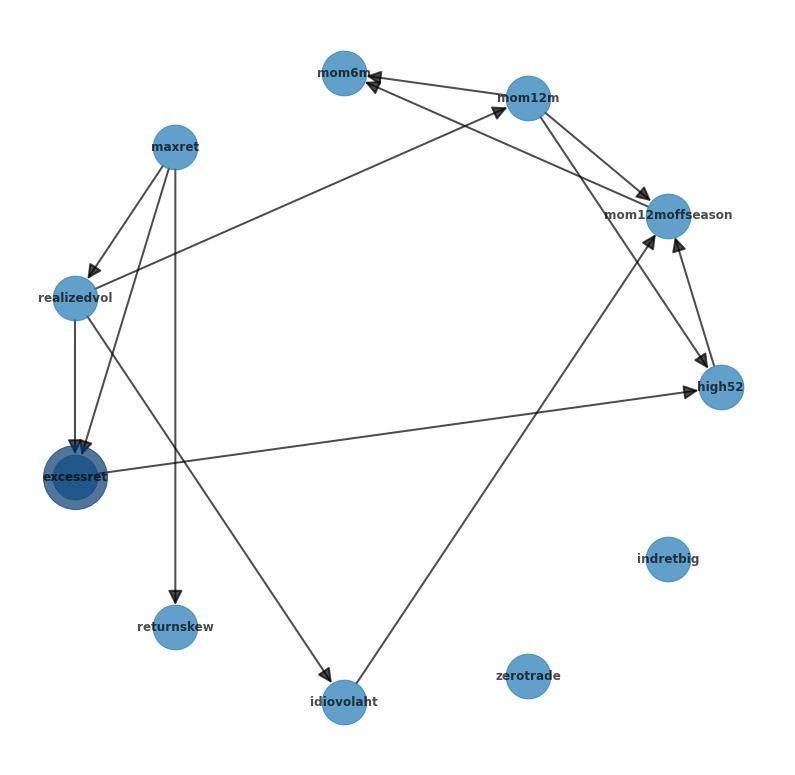

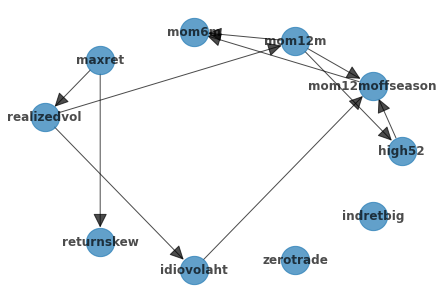

  0%|          | 0/64 [00:00<?, ?it/s]

high52 Accuracy score: 0.7


  0%|          | 0/67 [00:00<?, ?it/s]

mom12m Accuracy score: 0.76


  0%|          | 0/68 [00:00<?, ?it/s]

mom6m Accuracy score: 0.65


  0%|          | 0/73 [00:00<?, ?it/s]

maxret Accuracy score: 0.92


  0%|          | 0/67 [00:00<?, ?it/s]

mom12moffseason Accuracy score: 0.75


  0%|          | 0/71 [00:00<?, ?it/s]

realizedvol Accuracy score: 0.75


  0%|          | 0/71 [00:00<?, ?it/s]

idiovolaht Accuracy score: 0.83


  0%|          | 0/73 [00:00<?, ?it/s]

zerotrade Accuracy score: 0.99


  0%|          | 0/63 [00:00<?, ?it/s]

indretbig Accuracy score: 0.59


  0%|          | 0/66 [00:00<?, ?it/s]

returnskew Accuracy score: 0.7


  0%|          | 0/68 [00:00<?, ?it/s]

excessret Accuracy score: 0.76
F1 score: 0.6122448979591837
Accuracy score: 0.6545454545454545
Precision score: 0.7894736842105263
Recall score: 0.5
Log-likilihood score: -713.2433312088613
Structure score: -798.5211246034075

Check model: True

CPT of high52:
+-------------------------------+-----+-----------------------+
| excessret                     | ... | excessret(4. (> 12%)) |
+-------------------------------+-----+-----------------------+
| mom12m                        | ... | mom12m(4. (> 11%))    |
+-------------------------------+-----+-----------------------+
| high52(1. (<= 71%))           | ... | 5.952380952380952     |
+-------------------------------+-----+-----------------------+
| high52(2. (> 71% and <= 86%)) | ... | 5.952380952380952     |
+-------------------------------+-----+-----------------------+
| high52(3. (> 86% and <= 94%)) | ... | 82.14285714285714     |
+-------------------------------+-----+-----------------------+
| high52(4. (> 94%))            | .

In [6]:
# my z0 number:Z0198757
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% ! important; }<style>"))

import pandas as pd
import pgmpy as pg
import tabulate as tb
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import networkx as nx
from pgmpy.models import BayesianNetwork, BayesianModel
from pgmpy.estimators import HillClimbSearch

from pgmpy.estimators import BayesianEstimator, ExpectationMaximization, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# transform CSV file into a DataFrame
csv_path = 'finance_dataset.csv'
df = pd.read_csv(csv_path)
defined_columns = ['high52', 'mom12m', 'mom6m', 'maxret', 'mom12moffseason', 'realizedvol', 'idiovolaht', 'zerotrade', 'indretbig', 'returnskew', 'excessret']
df = df[defined_columns]

pd.options.display.float_format = '{:.0%}'.format

df.describe().transpose()

#discretise data into catagories
high52_labels = ['1. (<= 71%)', '2. (> 71% and <= 86%)', '3. (> 86% and <= 94%)', '4. (> 94%)']
mom12m_labels = ['1. (<= -25%)', '2. (> -25% and <= -7%)', '3. (> -7% and <= 11%)', '4. (> 11%)']
mom6m_labels = ['1. (<= -4%)', '2. (> -4% and <= 6%)', '3. (> 6% and <= 23%)', '4. (> 23%)']
maxret_labels= ['1. (<= -7%)', '2. (> -7% and <= -4%)', '3. (> -4% and <= -3%)', '4. (> -3%)']
mom12moffseason_labels= ['1. (<= -1%)', '2. (> -1% and <= 1%)', '3. (> 1% and <= 4%)', '4. (> 4%)']
realizedvol_labels= ['1. (<= -3%)', '2. (> -3% and <= -2%)', '3. (> -2% and <= -2%)', '4. (> -2%)']
idiovolaht_labels= ['1. (<= -3%)', '2. (> -3% and <= -2%)', '3. (> -2% and <= -2%)', '4. (> -2%)']
zerotrade_labels= ['1. (<= 0%)', '2. (> 0% and <= 0%)', '3. (> 0% and <= 0%)', '4. (> 0%)']
indretbig_labels= ['1. (<= 1%)', '2. (> 1% and <= 4%)', '3. (> 4% and <= 8%)', '4. (> 8%)']
returnskew_labels= ['1. (<= -60%)', '2. (> -60% and <= -21%)', '3. (> -21% and <= 16%)', '4. (> 16%)']
excessret_labels= ['1. (<= 0%)', '2. (> 0% and <= 5%)', '3. (> 5% and <= 12%)', '4. (> 12%)']

def make_discrete(df):
    discrete_df = pd.DataFrame()
    
    num_bins = 4

    discrete_df['high52'] = pd.cut(df['high52'], bins=num_bins, labels = high52_labels, precision=1)
    discrete_df['mom12m'] = pd.cut(df['mom12m'], bins=num_bins, labels=mom12m_labels, precision=1)
    discrete_df['mom6m'] = pd.cut(df['mom6m'], bins=num_bins, labels=mom6m_labels, precision=1)
    discrete_df['maxret'] = pd.cut(df['maxret'], bins=num_bins, labels=maxret_labels, precision=1)
    discrete_df['mom12moffseason'] = pd.cut(df['mom12moffseason'], bins=num_bins, labels=mom12moffseason_labels, precision=1)
    discrete_df['realizedvol'] = pd.cut(df['realizedvol'], bins=num_bins, labels=realizedvol_labels, precision=1)
    discrete_df['idiovolaht'] = pd.cut(df['idiovolaht'], bins=num_bins, labels=idiovolaht_labels, precision=1)
    discrete_df['zerotrade'] = pd.cut(df['zerotrade'], bins=num_bins, labels=zerotrade_labels, precision=1)
    discrete_df['indretbig'] = pd.cut(df['indretbig'], bins=num_bins, labels=indretbig_labels, precision=1)
    discrete_df['returnskew'] = pd.cut(df['returnskew'], bins=num_bins, labels=returnskew_labels, precision=1)
    discrete_df['excessret'] = pd.cut(df['excessret'], bins=num_bins, labels=excessret_labels, precision=1)

    discrete_df = discrete_df.astype('object')

    return discrete_df

cat_df = make_discrete(df)

for column in cat_df:
    print(cat_df.groupby(column)[column].count().reset_index(name='Count').to_dict(orient='records'))
    
training_data, testing_data = train_test_split(cat_df, test_size=0.2, random_state=20)

hc = HillClimbSearch(data=training_data)
estimate = hc.estimate(scoring_method='k2score')

model = BayesianNetwork(estimate)

# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []

model.fit(data=training_data,
    estimator=BayesianEstimator,
    prior_type='BDeu',
    complete_samples_only=True)


# Plot the model as a graph

plt.figure(3,figsize=(14,14)) 
G = nx.DiGraph()
G.add_edges_from(model.edges)


G.add_nodes_from(model.nodes)
pos = nx.circular_layout(G)
DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(G,
                pos=pos,
                with_labels=True,
                node_size=2000,
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

tt_g = G.subgraph(nodes=['excessret'])
nx.draw(tt_g, pos=pos, with_labels=False, arrowsize=0, node_size=4100, alpha=0.7, font_weight="bold", node_color='#063970')

plt.show()

sub_g = G.subgraph(nodes= ['high52', 'mom12m', 'mom6m', 'maxret', 'mom12moffseason', 'realizedvol', 'idiovolaht', 'zerotrade', 'indretbig', 'returnskew'])
nx.draw(sub_g, pos=pos, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")  # Draw the original graph
plt.show()

# Scoring the model

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)

    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy
    
    
sum = 0
for v in accuracy_dict.values():
    sum += v

accuracy_dict['Average'] = sum / len(accuracy_dict.keys())

accuracy_dict

f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')

print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Structure score: {ss}')

print(model.name)

### Conditional Probability Table (CPT)
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

### Write your description in the following space.

my z0 number:Z0198757

I use a Bayesian Network method to analysis the relationship between 10 defined features and the target variable: excessret. Here’s the four steps: 1) data description 2) discretize data into categories 3) create training and test datasets 4) build the model 5) plot the graph 6) scoring the model 7) Create conditional probability table

1)	data description. 

I use df.describe().transpose() to check the mean and quantile of each column

2)	discretize data into categories.

because Bayesian network method naturally needs input to be categorical, So I need to discretize data before modeling. Based on the quantile, I divided all variables into four bins (see function make_discrete(df)).

3) create training and test datasets.

I use train_test_split function to select 20% of data as test data set. 

4) build the model.

I use a hill climbing algorithm with the K2 score to performe Bayesian network structure learning

5) plot the graph. 

I use draw_networkx to draw the relationship between variables.

6) scoring the model.

I use accuracy_score function to estimate the performance of my model, and got a excessret Accuracy score at 0.76. The average accuracy score is 0.65

7) Create conditional probability table.

I also created the Conditional Probability Table by using get_cpds() functions.

To sum up, the accuracy of my model is less than satisfactory. More parameter adjustment is still needed in the future. 

word count: 224